<a id='topo'></a>

# Comparando arquiteturas

### [Modelo 1:](#modelo_1)
- Fully connected 128 activation relu
- Fully connected 10 activation softmax

### [Modelo 2:](#modelo_2)
- Convolution2D filter 3x3 activation relu
- MaxPooling2D filter 3x3 
- Dropout 0.2
- Flatten
- Fully connected 128 activation relu
- Fully connected 10 activation softmax

### [Modelo 3:](#modelo_3)
- Convolution2D filter 5x5 activation relu
- MaxPooling2D filter 4x4
- Dropout 0.2
- Flatten
- Fully connected 128 activation relu
- Fully connected 10 activation softmax

In [1]:
# seed para Pyhton 
import random as rn
rn.seed(1254)

# seed para Tensorflow
import tensorflow as tf
tf.set_random_seed(89)

/home/camilalm/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Samples shape: (2062, 64, 64)
Labels shape: (2062, 10)

Training shape: (1752, 64, 64)
1752 sample, 64 x 64 size grayscale image.



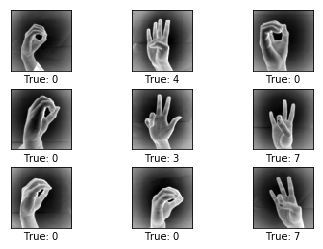

Test shape: (310, 64, 64)
310 sample, 64 x 64 size grayscale image.



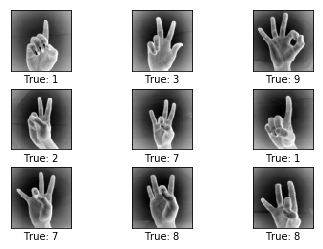

In [3]:
# Configura conjuntos de treinamento e teste 
# X_train, X_test, Y_train, Y_test
%run './functions/SLD-LoadTrainTestSets.ipynb'

In [4]:
import keras
from keras import backend as K
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.models import Sequential, Model, Input
from keras.applications.mobilenet import MobileNet
from keras.layers import Conv2D, GlobalAveragePooling2D, Reshape, MaxPooling2D
from keras.optimizers import Adam

In [5]:
input_shape = (64,64)
adam_lr = 0.0001
nb_epochs = 10
cm_plot_labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
validation_split = 0.1
batch_size=10
resultados = []

<a id='modelo_1'></a>

## Modelo 1 
- Fully connected 128 activation relu
- Fully connected 10 activation softmax

[Voltar para topo](#topo)

In [6]:
model_1 = Sequential()
model_1.add(Flatten(input_shape=input_shape))
model_1.add(Dense(128, activation='relu'))
model_1.add(Dense(10, activation='softmax'))
model_1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               524416    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 525,706
Trainable params: 525,706
Non-trainable params: 0
_________________________________________________________________


Train on 1576 samples, validate on 176 samples
Epoch 1/10
1576/1576 [==============================] - 1s 829us/step - loss: 2.3044 - acc: 0.1453 - val_loss: 2.1623 - val_acc: 0.2102
Epoch 2/10
1576/1576 [==============================] - 1s 761us/step - loss: 2.1485 - acc: 0.2119 - val_loss: 2.1203 - val_acc: 0.2330
Epoch 3/10
1576/1576 [==============================] - 1s 750us/step - loss: 1.9876 - acc: 0.3401 - val_loss: 1.9262 - val_acc: 0.3352
Epoch 4/10
1576/1576 [==============================] - 1s 740us/step - loss: 1.8652 - acc: 0.3864 - val_loss: 1.8813 - val_acc: 0.3636
Epoch 5/10
1576/1576 [==============================] - 1s 715us/step - loss: 1.7827 - acc: 0.4175 - val_loss: 1.7783 - val_acc: 0.3523
Epoch 6/10
1576/1576 [==============================] - 1s 777us/step - loss: 1.7131 - acc: 0.4702 - val_loss: 1.7414 - val_acc: 0.3636
Epoch 7/10
1576/1576 [==============================] - 1s 700us/step - loss: 1.6228 - acc: 0.5025 - val_loss: 1.6434 - val_acc: 0.4659
E

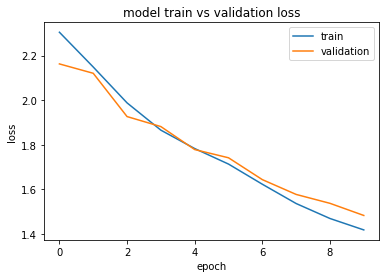

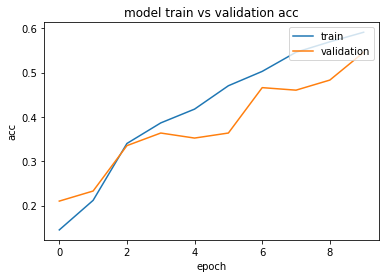

Acertos: 184 / 310
Confusion matrix, without normalization
[[27  1  1  0  2  0  0  1  0  0]
 [ 3 14  3  0  1  0  0  0  3  0]
 [ 2  2 29  0  1  0  0  0  0  0]
 [ 0  0  8 22  0  0  0  0  0  0]
 [ 3  0  3  0 14  2  0  6  0  2]
 [ 1  0  0  4  3 24  0  1  0  2]
 [ 1  0 11  0 12  0  0  3  1  0]
 [ 4  3 13  0  0  1  0 19  1  1]
 [ 2  1  7  1  0  1  0  3 10  3]
 [ 0  0  0  0  2  0  0  0  0 25]]
CPU times: user 43.8 s, sys: 6.82 s, total: 50.6 s
Wall time: 12.3 s


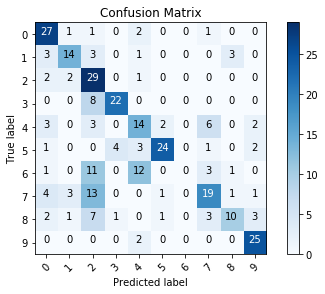

In [7]:
%%time
acertos, pred_1 = execute_model(model_1, X_train, Y_train, X_test, Y_test,
                                validation_split, batch_size, cm_plot_labels, 
                                adam_lr, nb_epochs)
resultados.append({'modelo': 'model_1', 'acertos': acertos})

<a id='modelo_2'></a>

## Modelo 2
- Convolution2D filter 3x3 activation relu
- MaxPooling2D filter 3x3 
- Dropout 0.2
- Flatten
- Fully connected 128 activation relu
- Fully connected 10 activation softmax

[Voltar para topo](#topo)

In [8]:
y = x = Input(shape=(64,64,1))
y = Conv2D(3, kernel_size=(3, 3), activation='relu')(y)
y = MaxPooling2D(pool_size=(3, 3))(y)
y = Dropout(0.2)(y)
y = Flatten()(y)
y = Dense(128, activation='relu')(y)
y = Dense(10, activation='softmax')(y)
model_2 = Model(inputs=x, outputs=y)
model_2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 64, 64, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 62, 3)         30        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 20, 20, 3)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 20, 20, 3)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1200)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               153728    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total para

In [9]:
expand_train_X = np.expand_dims(X_train, axis=-1)
expand_test_X = np.expand_dims(X_test, axis=-1)

Train on 1576 samples, validate on 176 samples
Epoch 1/10
1576/1576 [==============================] - 1s 835us/step - loss: 2.3232 - acc: 0.1117 - val_loss: 2.2447 - val_acc: 0.2273
Epoch 2/10
1576/1576 [==============================] - 1s 639us/step - loss: 2.2313 - acc: 0.1929 - val_loss: 2.1272 - val_acc: 0.4375
Epoch 3/10
1576/1576 [==============================] - 1s 632us/step - loss: 2.0918 - acc: 0.2944 - val_loss: 2.0008 - val_acc: 0.4489
Epoch 4/10
1576/1576 [==============================] - 1s 628us/step - loss: 1.9483 - acc: 0.4201 - val_loss: 1.8419 - val_acc: 0.5568
Epoch 5/10
1576/1576 [==============================] - 1s 626us/step - loss: 1.8079 - acc: 0.4702 - val_loss: 1.7123 - val_acc: 0.5966
Epoch 6/10
1576/1576 [==============================] - 1s 636us/step - loss: 1.6702 - acc: 0.5349 - val_loss: 1.5958 - val_acc: 0.5909
Epoch 7/10
1576/1576 [==============================] - 1s 648us/step - loss: 1.5568 - acc: 0.5723 - val_loss: 1.4918 - val_acc: 0.6307
E

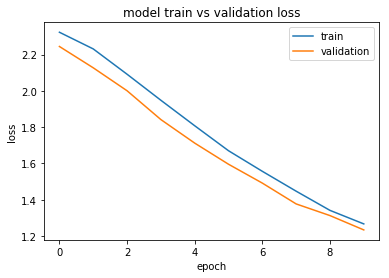

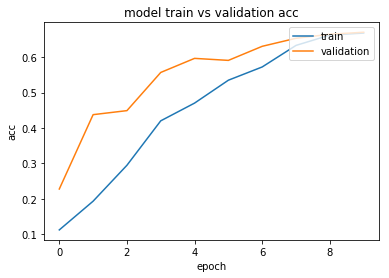

Acertos: 203 / 310
Confusion matrix, without normalization
[[28  0  0  0  0  0  1  2  1  0]
 [ 4 17  0  0  0  0  0  3  0  0]
 [ 1  1 22  1  0  0  5  4  0  0]
 [ 0  1  2 27  0  0  0  0  0  0]
 [ 2  0  0  0  4  3  8 11  1  1]
 [ 0  0  0  5  2 27  0  1  0  0]
 [ 0  1  3  0  2  0 18  4  0  0]
 [ 2  2  1  0  0  0  3 33  1  0]
 [ 0  1  1  0  2  1  2  9 12  0]
 [ 0  0  0  1  1  7  0  2  1 15]]
CPU times: user 34.4 s, sys: 4.1 s, total: 38.5 s
Wall time: 11.1 s


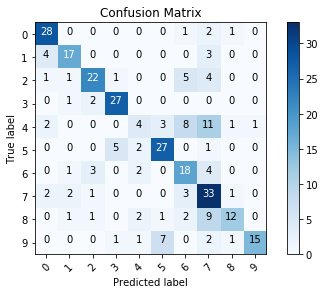

In [10]:
%%time
acertos, pred_2 = execute_model(model_2, expand_train_X, Y_train, expand_test_X, Y_test, 
                                validation_split, batch_size, cm_plot_labels, 
                                adam_lr, nb_epochs)
resultados.append({'modelo': 'model_2', 'acertos': acertos})

<a id='modelo_3'></a>

## Modelo 3 
- Convolution2D filter 5x5 activation relu
- MaxPooling2D filter 4x4
- Dropout 0.2
- Flatten
- Fully connected 128 activation relu
- Fully connected 10 activation softmax

[Voltar para topo](#topo)

In [11]:
y = x = Input(shape=(64,64,1))
y = Conv2D(3, kernel_size=(5, 5), activation='relu')(y)
y = MaxPooling2D(pool_size=(4, 4))(y)
y = Dropout(0.2)(y)
y = Flatten()(y)
y = Dense(128, activation='relu')(y)
y = Dense(10, activation='softmax')(y)
model_3 = Model(inputs=x, outputs=y)
model_3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 64, 64, 1)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 3)         78        
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 3)         0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 15, 15, 3)         0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 675)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               86528     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1290      
Total para

Train on 1576 samples, validate on 176 samples
Epoch 1/10
1576/1576 [==============================] - 2s 1ms/step - loss: 2.2827 - acc: 0.1472 - val_loss: 2.2184 - val_acc: 0.2841
Epoch 2/10
1576/1576 [==============================] - 1s 920us/step - loss: 2.1664 - acc: 0.3344 - val_loss: 2.0730 - val_acc: 0.4716
Epoch 3/10
1576/1576 [==============================] - 1s 950us/step - loss: 2.0135 - acc: 0.4949 - val_loss: 1.9008 - val_acc: 0.5852
Epoch 4/10
1576/1576 [==============================] - 2s 969us/step - loss: 1.8377 - acc: 0.5654 - val_loss: 1.7239 - val_acc: 0.6477
Epoch 5/10
1576/1576 [==============================] - 2s 1ms/step - loss: 1.6733 - acc: 0.5996 - val_loss: 1.5665 - val_acc: 0.6989
Epoch 6/10
1576/1576 [==============================] - 2s 976us/step - loss: 1.5245 - acc: 0.6294 - val_loss: 1.4213 - val_acc: 0.6989
Epoch 7/10
1576/1576 [==============================] - 1s 949us/step - loss: 1.3732 - acc: 0.6821 - val_loss: 1.2946 - val_acc: 0.6932
Epoch

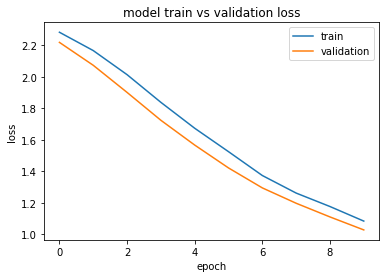

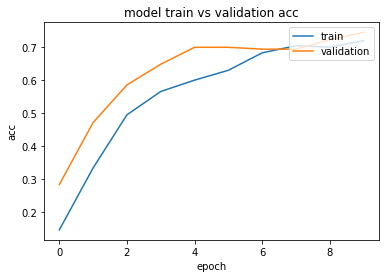

Acertos: 225 / 310
Confusion matrix, without normalization
[[29  2  0  0  0  0  0  0  1  0]
 [ 3 18  1  0  0  0  0  0  2  0]
 [ 0  2 27  0  0  0  4  1  0  0]
 [ 0  0  3 27  0  0  0  0  0  0]
 [ 2  0  1  0 19  1  0  3  3  1]
 [ 0  0  0  4  2 27  0  0  0  2]
 [ 1  0  6  0  3  0 15  2  1  0]
 [ 3  0  4  0  3  0  0 24  7  1]
 [ 0  1  2  0  3  0  0  2 16  4]
 [ 0  0  0  0  1  1  1  0  1 23]]
CPU times: user 53.2 s, sys: 4.25 s, total: 57.4 s
Wall time: 16 s


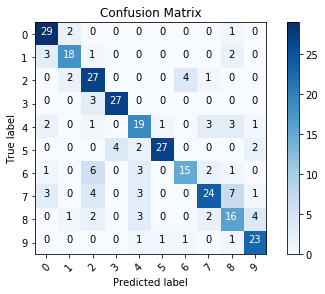

In [12]:
%%time
acertos, pred_3 = execute_model(model_3, expand_train_X, Y_train, expand_test_X, Y_test,
                                validation_split, batch_size, cm_plot_labels, 
                                adam_lr, nb_epochs)
resultados.append({'modelo': 'model_3', 'acertos': acertos})

[Voltar para topo](#topo)